# CIS 9660 - Data Mining
# Semester Project
# Project Name: News Article Classification

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib;
import matplotlib.pyplot as plt;
import seaborn as sns;
import squarify;

## Load data and inspect

In [2]:
df= pd.read_json(r'News_Category_Dataset_v2.json',lines=True)

In [3]:
df.shape

(200853, 6)

In [4]:
df.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

### Merge Potential Duplicate Categories

In [5]:
df.loc[df.category=="THE WORLDPOST",'category']="WORLDPOST"
df.loc[df.category=="CULTURE & ARTS" ,'category']="ARTS & CULTURE"
df.loc[df.category=="ARTS",'category']="ARTS & CULTURE"
df.loc[df.category=="STYLE",'category']="STYLE & BEAUTY"

### Check for duplicate rows and remove duplicates

In [6]:
df[df.duplicated()]

,category,headline,authors,link,short_description,date
59003,POLITICS,"On Facebook, Trump's Longtime Butler Calls For...",,https://www.huffingtonpost.comhttp://www.mothe...,"Anthony Senecal, who worked as Donald Trump's ...",2016-05-12
59249,TECH,Former Facebook Workers: We Routinely Suppress...,,https://www.huffingtonpost.comhttp://gizmodo.c...,Facebook workers routinely suppressed news sto...,2016-05-09
61565,WOMEN,"On Equal Pay Day, The Gap Is Still Too Wide",,https://www.huffingtonpost.comhttp://www.cnbc....,Equal Pay Day falls on April 12 in 2016. It's ...,2016-04-12
131156,WELLNESS,The World's Most Dangerous Workout?,,https://www.huffingtonpost.comhttp://www.cnn.c...,"Is the ""sport of fitness"" the world's most dan...",2014-02-10
135735,WELLNESS,Some People Call It 'The Best Anti-Smoking Ad ...,,https://www.huffingtonpost.comhttp://www.upwor...,Almost all smokers know cigarettes are bad for...,2013-12-22
136468,ENVIRONMENT,10 Cities That Could Run Out Of Water - Weathe...,,https://www.huffingtonpost.comhttp://www.weath...,"Securing access to plentiful, renewable source...",2013-12-15
169481,TECH,Google Is Attacking Apple From The Inside Out ...,,https://www.huffingtonpost.comhttp://www.busin...,After years of hammering away at Apple's share...,2013-01-01
178655,WELLNESS,"Eating For Health, Not Weight",,https://www.huffingtonpost.comhttp://www.nytim...,Almost half of Americans are on a diet -- not ...,2012-09-23
185922,TECH,Apple Removes Green EPEAT Electronics Certific...,,https://www.huffingtonpost.comhttp://blogs.wsj...,Apple has pulled its products off the U.S. gov...,2012-07-07
185924,TECH,Microsoft's $6.2 Billion Writedown Shows It's ...,,https://www.huffingtonpost.comhttp://www.theda...,Fighting for online advertising dominance with...,2012-07-07


In [7]:
df = df.drop_duplicates()
df.shape

(200840, 6)

### Check for NA

In [8]:
df.isna().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

### Investigate Authors column to see assess importance of that parameter

Top 10 authors:

Lee Moran            2423
Ron Dicker           1913
Reuters, Reuters     1562
Ed Mazza             1322
Cole Delbyck         1140
Andy McDonald        1068
Julia Brucculieri    1059
Carly Ledbetter      1054
Curtis M. Wong       1020
Name: authors, dtype: int64


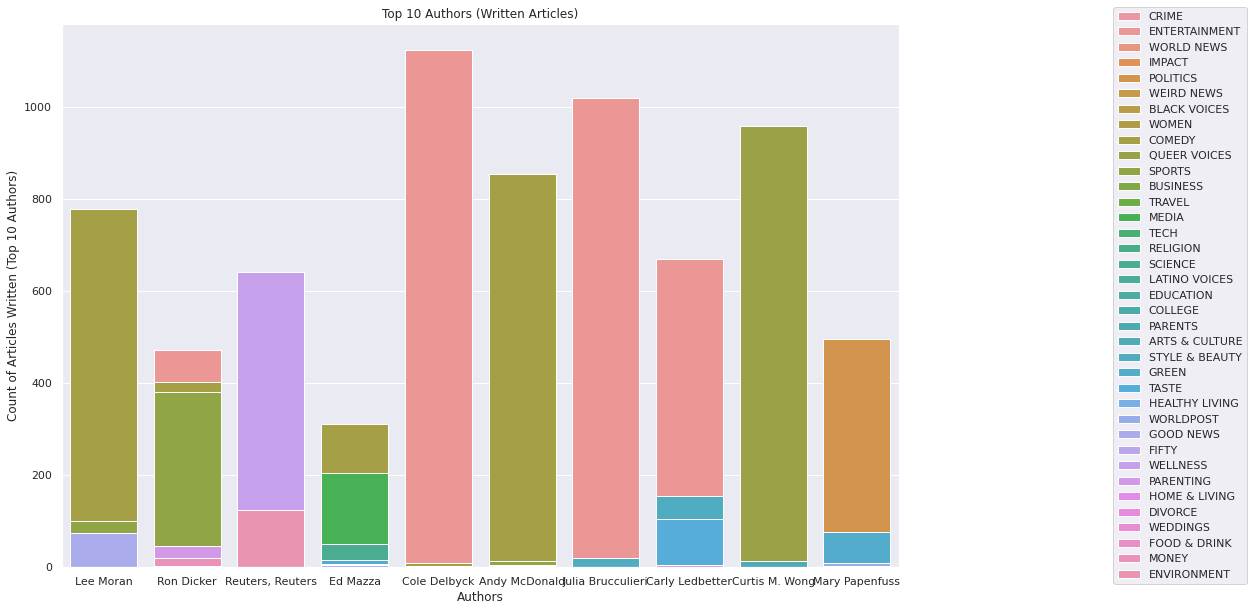

In [9]:
print("Top 10 authors:\n")
print(df['authors'].value_counts().iloc[1:10,])
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
p = (sns.countplot(data=df, x = df['authors'],
                  order=df.authors.value_counts().iloc[1:11].index, hue = 'category', dodge = False))
p.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlabel('Authors')
plt.ylabel('Count of Articles Written (Top 10 Authors)')
plt.title('Top 10 Authors (Written Articles)');


#### Several Authors have been attributed to more than 1000 articles. Authors also tend to write within the same category therefore, it may hold value to use Author names as a token in our model

### Understand the distribution of Categories in our dataset

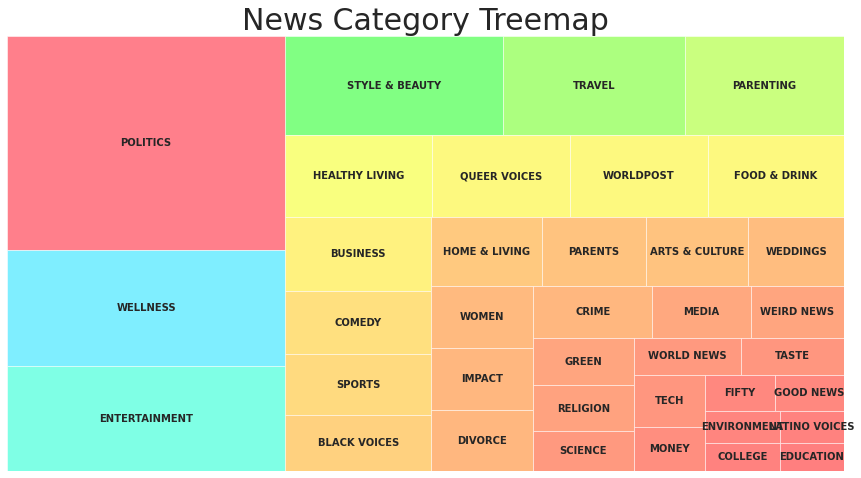

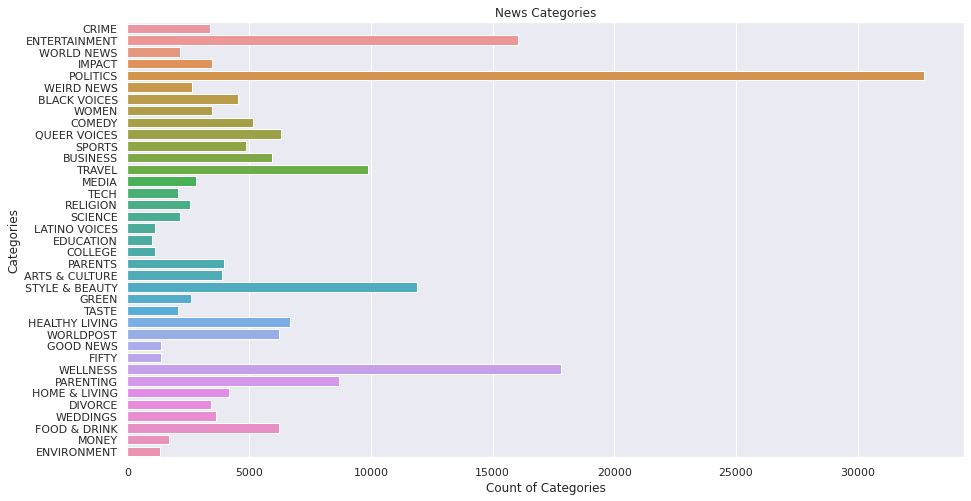

Category          Percentage of dataset
------------------------------------

POLITICS          16.300538
WELLNESS           8.874726
ENTERTAINMENT      7.995419
STYLE & BEAUTY     5.925115
TRAVEL             4.922824
PARENTING          4.320355
HEALTHY LIVING     3.333001
QUEER VOICES       3.143796
WORLDPOST          3.108445
FOOD & DRINK       3.099980
BUSINESS           2.956084
COMEDY             2.576678
SPORTS             2.431786
BLACK VOICES       2.254531
HOME & LIVING      2.088727
PARENTS            1.969229
ARTS & CULTURE     1.930890
WEDDINGS           1.817865
WOMEN              1.737204
IMPACT             1.722266
DIVORCE            1.705835
CRIME              1.695379
MEDIA              1.401613
WEIRD NEWS         1.329416
GREEN              1.305517
RELIGION           1.272655
SCIENCE            1.084445
WORLD NEWS         1.083947
TASTE              1.043617
TECH               1.034654
MONEY              0.849930
FIFTY              0.697570
GOOD NEWS          0.69607

In [10]:
percentages =df['category'].value_counts(normalize=True)*100

#Treemap
cmap = matplotlib.cm.hsv
mini = min(percentages)
maxi = max(percentages)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in percentages]
plt.figure(figsize=(15,8))
squarify.plot(sizes=percentages, label=percentages.index, text_kwargs ={'fontsize':10, 'weight': 'bold'}, alpha=0.5, color=colors)
plt.axis('off')
plt.gca().invert_yaxis()
plt.title("News Category Treemap", fontsize=30)

#Horizontal Bar Plot
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="category", data=df)
plt.xlabel('Count of Categories')
plt.ylabel('Categories')
plt.title('News Categories');
plt.show()

print("Category          Percentage of dataset\n------------------------------------\n")
print(percentages)

### Explore the data to see the change of news articles represented in this dataset over the years

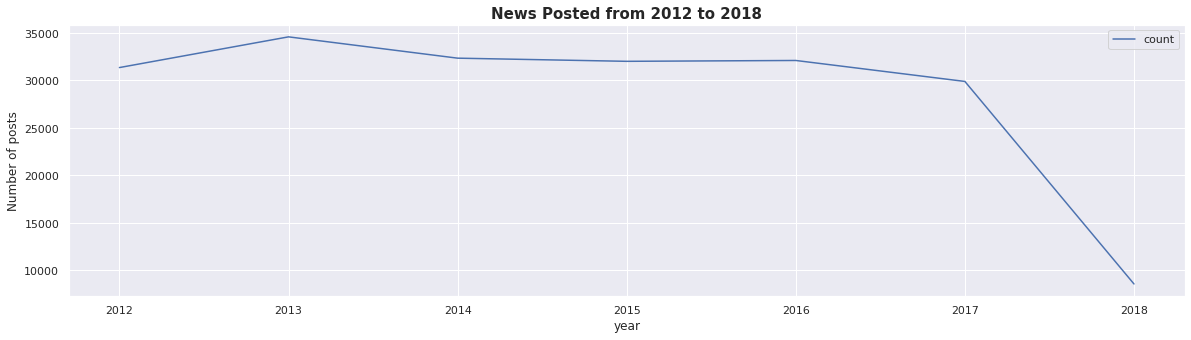

In [11]:
import datetime as dt
df_time=df.copy()
df_time['year'] = df_time['date'].dt.year
df_year = df_time['year'].value_counts()
df_year = pd.DataFrame( {'year': df_year.index, 
                         'count': df_year.values })
df_year = df_year.sort_values(['year'], ascending = True).reset_index(drop = True)
ax = df_year.plot(kind = 'line', x = 'year', y = 'count', figsize = (20, 5))
ax.set_ylabel('Number of posts')
ax.set_title('News Posted from 2012 to 2018', fontweight = 'bold', size = 15);



#### The peak of quantity of posts was in 2013 and the lowest was in 2018. This is most likely because the dataset was published in May 26th 2018, 

### How has Category Distribution changed over the years?

In [12]:
df_2012 = df_time[df_time['year'] == 2012]
df_2014 = df_time[df_time['year'] == 2014]
df_2016 = df_time[df_time['year'] == 2016]
df_2018 = df_time[df_time['year'] == 2018]

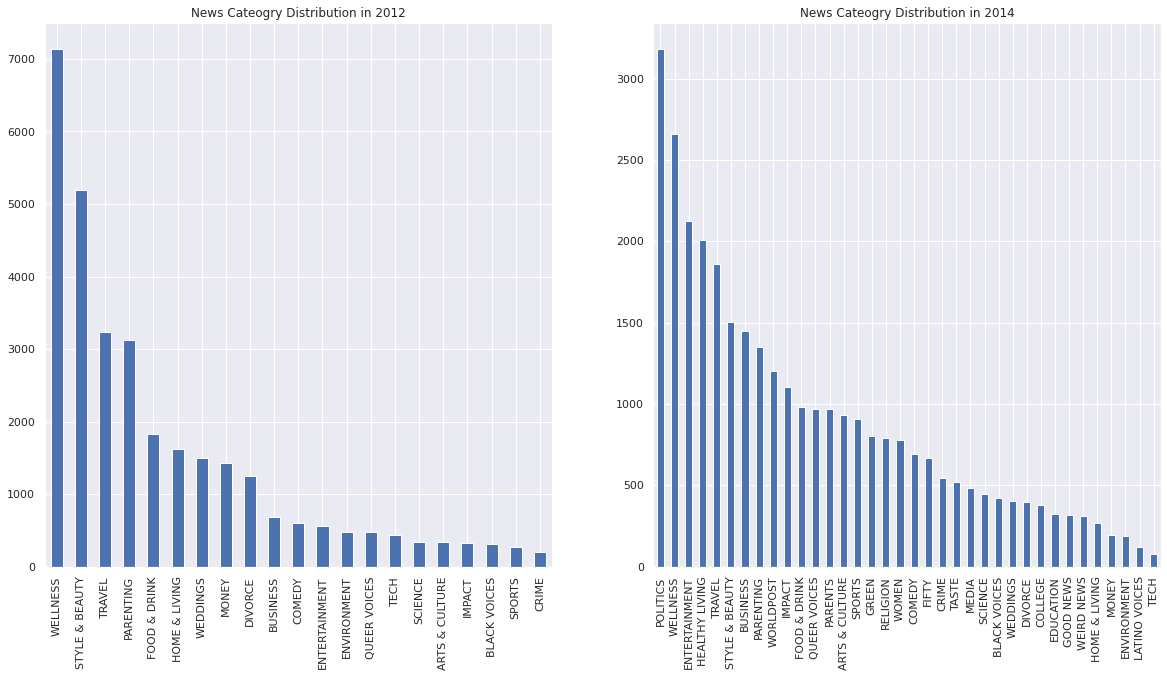

In [13]:
f, axes = plt.subplots(1, 2)
df_2012['category'].value_counts().sort_values(ascending = False).plot(kind = 'bar', ax = axes[0], figsize = (20,10), title = "News Cateogry Distribution in 2012");
df_2014['category'].value_counts().sort_values(ascending = False).plot(kind = 'bar', ax = axes[1], figsize = (20,10), title = "News Cateogry Distribution in 2014");

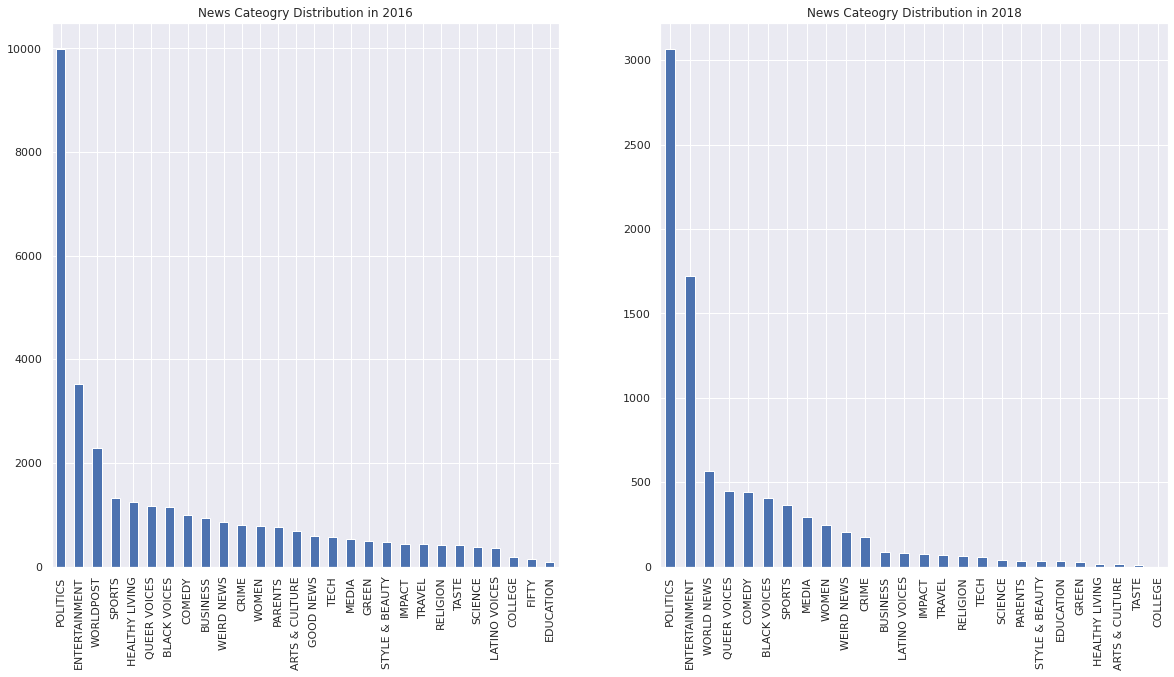

In [14]:
f, axes = plt.subplots(1, 2)
df_2016['category'].value_counts().sort_values(ascending = False).plot(kind = 'bar', ax = axes[0], figsize = (20,10), title = "News Cateogry Distribution in 2016");
df_2018['category'].value_counts().sort_values(ascending = False).plot(kind = 'bar', ax = axes[1], figsize = (20,10), title = "News Cateogry Distribution in 2018");

#### The highest news posts were categorized WELLNESS in 2012 and POLITICS in the rest of the years. 

### This analysis will focus on text as the main data to build our model. 
### A new text Column will be generated, which will be used to train our models. Headlines, short description, and Author names will make up our text column. 

In [15]:
df['authors']=df['authors'].str.replace(' ','')
df['text']=df['headline']+' '+df['short_description']+' '+df['authors']

### Create functions to tokenize and cleanse our text for stopwords, punctuation, and numbers. 

In [16]:
import nltk
from nltk.tokenize import RegexpTokenizer
import string

def clean(doc):    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(doc)
    
    stopword_list = nltk.corpus.stopwords.words('english')   
    result =[]
    for token in tokens:
        token = token.strip(string.punctuation).lower()
        try:
            int(token)
        except Exception:
            if token not in stopword_list:
                result.append(token)
    return result


In [17]:
def listtostring(wordlist):
    result =" "
    
    return result.join(wordlist)

### Tokenize and clean our text column

In [18]:
df['text']=df['text'].apply(clean)

In [19]:
df['textstring'] = df['text'].apply(listtostring)

In [20]:
df['text'].head()

0    [mass, shootings, texas, last, week, tv, left,...
1    [smith, joins, diplo, nicky, jam, world, cup, ...
2    [hugh, grant, marries, first, time, age, actor...
3    [jim, carrey, blasts, castrato, adam, schiff, ...
4    [julianna, margulies, uses, donald, trump, poo...
Name: text, dtype: object

### Create dictionary of Vocabulary and frequency

In [27]:
vocab ={}
words =[]
for tokens in list(df['text']):
    for token in tokens:
        if not token in vocab:
            vocab[token]=1
        else:
            vocab[token]+=1
    words.extend(token)
        

In [28]:
#print a few key-value pairs in vocab
rows=0
for word in vocab:
    print(f'word: {word} | frequency: {vocab[word]}')
    rows+=1
    if rows==20:
        break

word: mass | frequency: 580
word: shootings | frequency: 234
word: texas | frequency: 1094
word: last | frequency: 4764
word: week | frequency: 7135
word: tv | frequency: 1588
word: left | frequency: 1480
word: husband | frequency: 1303
word: killed | frequency: 1270
word: children | frequency: 4758
word: another | frequency: 3162
word: day | frequency: 11056
word: america | frequency: 4198
word: melissajeltsen | frequency: 114
word: smith | frequency: 656
word: joins | frequency: 234
word: diplo | frequency: 9
word: nicky | frequency: 8
word: jam | frequency: 130
word: world | frequency: 8982


### Plot of number of words per frequency of occurence. 

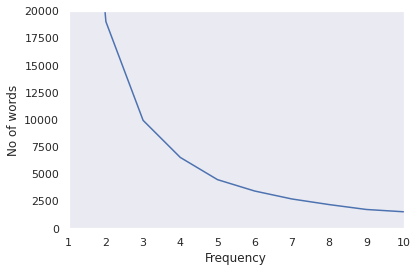

In [29]:
num_words = [0 for i in range(max(vocab.values())+1)] 
freq = [i for i in range(max(vocab.values())+1)] 
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

## Exploratory Sentiment Analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon');

In [31]:
analyzer = SentimentIntensityAnalyzer()

In [32]:
# Create the list of sentiment scores
newscat_sentiments = []
for index,article in df.iterrows():
    
    text = article['textstring']
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]

    newscat_sentiments.append({
        "headline":article['headline'],
        "text": text,
        "compound": compound,
        "positive": pos,
        "negative": neg,
        "neutral": neu,
        "category":article['category']
    })
    
# Create DataFrame for sentiment scores
sentiments_df = pd.DataFrame(newscat_sentiments)
sentiments_df.head()

,headline,text,compound,positive,negative,neutral,category
0,There Were 2 Mass Shootings In Texas Last Week...,mass shootings texas last week tv left husband...,-0.6705,0.000,0.257,0.743,CRIME
1,Will Smith Joins Diplo And Nicky Jam For The 2...,smith joins diplo nicky jam world cup official...,0.0000,0.000,0.000,1.000,ENTERTAINMENT
2,Hugh Grant Marries For The First Time At Age 57,hugh grant marries first time age actor longti...,0.3612,0.143,0.000,0.857,ENTERTAINMENT
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts castrato adam schiff democra...,-0.7506,0.000,0.303,0.697,ENTERTAINMENT
4,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...,0.0000,0.000,0.000,1.000,ENTERTAINMENT


In [33]:
sentiments_df.groupby('category').mean()

,compound,positive,negative,neutral
category,,,,
ARTS & CULTURE,0.231846,0.161290,0.074254,0.764454
BLACK VOICES,0.036906,0.147176,0.129714,0.723107
BUSINESS,0.122935,0.151718,0.111371,0.736905
COLLEGE,0.000301,0.135966,0.148691,0.715337
COMEDY,0.104232,0.161916,0.113875,0.724207
CRIME,-0.478494,0.062519,0.288693,0.648779
DIVORCE,0.142135,0.166885,0.109914,0.723206
EDUCATION,0.228891,0.158689,0.079772,0.761547
ENTERTAINMENT,0.121145,0.161733,0.104217,0.734048


Looking at the sentiment ratings of the news articles, the majority of the words used are classified as nuetral. It may not be advantageous to incorporate sentiment into our model. 

### TF-IDF Vectors of words to understand weight and importance in our dataset

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
# Getting the TF-IDF Weights 
all_words = df["textstring"]
vectorizer = TfidfVectorizer(stop_words="english")
corpus = vectorizer.fit_transform(all_words)
words_corpus = vectorizer.get_feature_names()

In [36]:
# Getting the TF-IDF weight of each word in corpus as DataFrame
word_corpus_df = pd.DataFrame(list(zip(words_corpus, np.ravel(corpus.mean(axis=0)))), columns=["Word", "TF-IDF"])
word_corpus_df = word_corpus_df.sort_values(by=["TF-IDF"], ascending=False)

In [37]:
# Highest 10 TF-IDF scores
word_corpus_df.head(10)

,Word,TF-IDF
25845,contributor,0.013315
125690,trump,0.011198
87981,new,0.009722
94417,people,0.007125
123353,time,0.006923
75143,like,0.006787
95475,photos,0.006784
37047,day,0.006643
134169,year,0.006161
74943,life,0.005718


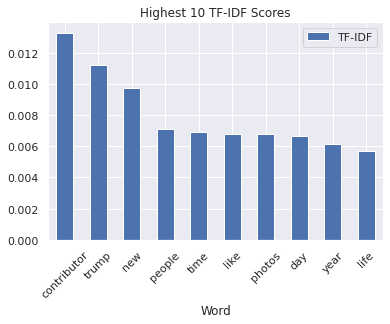

In [38]:
word_corpus_df[:10].plot.bar(x="Word", y="TF-IDF", title="Highest 10 TF-IDF Scores", rot=45)
plt.xlabel="Word"

# Modeling

In [39]:
# Performance Evaluation function

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score,classification_report
from sklearn.metrics import confusion_matrix

def print_scores(y_pred,y_test):
    print("recall score: ", recall_score(y_test,y_pred,average='weighted'))
    print("precision score: ", precision_score(y_test,y_pred,average='weighted',zero_division=0))
    print("f1 score: ", f1_score(y_test,y_pred,average='weighted'))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("\n")
    print(classification_report(y_pred,y_test,zero_division=0))

## Multinomial Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_extraction import text
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

In [41]:
df.columns

Index(['category', 'headline', 'authors', 'link', 'short_description', 'date',
       'text', 'textstring'],
      dtype='object')

In [42]:
X = df['textstring']
Y=df['category']

In [43]:
print(X)

0         mass shootings texas last week tv left husband...
1         smith joins diplo nicky jam world cup official...
2         hugh grant marries first time age actor longti...
3         jim carrey blasts castrato adam schiff democra...
4         julianna margulies uses donald trump poop bags...
                                ...                        
200848    rim ceo thorsten heins significant plans black...
200849    maria sharapova stunned victoria azarenka aust...
200850    giants patriots jets colts among improbable su...
200851    aldon smith arrested 49ers linebacker busted d...
200852    dwight howard rips teammates magic loss hornet...
Name: textstring, Length: 200840, dtype: object


In [44]:
def lemantize(row):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    row = row.split()
    return listtostring([lemmatizer.lemmatize(w) for w in row])
    
def modeling(X,Y,model,lemant=False):
    model = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', model),
                  ])
    if lemant:
        print("Using Lemantization:\n")
        X=X.apply(lemantize)
        Y=Y.apply(lemantize)
        
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
    
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    print_scores(Y_predict, Y_test)

In [45]:
print("Metrics of Multinomial Naive Bayes Model\n")
modeling(X,Y,MultinomialNB())

Metrics of Multinomial Naive Bayes Model

recall score:  0.4547898824935272
precision score:  0.6767185714529272
f1 score:  0.3566955360077631
accuracy score:  0.4547898824935272


                precision    recall  f1-score   support

ARTS & CULTURE       0.05      0.94      0.10        51
  BLACK VOICES       0.00      1.00      0.01         4
      BUSINESS       0.05      0.93      0.10        85
       COLLEGE       0.00      0.00      0.00         0
        COMEDY       0.04      0.95      0.09        62
         CRIME       0.02      0.85      0.04        20
       DIVORCE       0.06      1.00      0.11        52
     EDUCATION       0.00      0.00      0.00         0
 ENTERTAINMENT       0.83      0.53      0.64      6203
   ENVIRONMENT       0.00      0.00      0.00         0
         FIFTY       0.00      0.00      0.00         0
  FOOD & DRINK       0.61      0.76      0.67      1261
     GOOD NEWS       0.00      0.00      0.00         0
         GREEN       0.00      1.0

# -----------------------------------------------------------------------------------------------------
## Linear Support Vector Machine using SGBClassifier with hinge loss function

In [46]:
print("Metrics of Linear Support Vector Machine (SGDClassifer)\n")
modeling(X,Y,SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))

Metrics of Linear Support Vector Machine (SGDClassifer)

recall score:  0.6605855407289385
precision score:  0.6725232778824523
f1 score:  0.6366470027809561
accuracy score:  0.6605855407289385


                precision    recall  f1-score   support

ARTS & CULTURE       0.58      0.78      0.67       688
  BLACK VOICES       0.35      0.73      0.48       550
      BUSINESS       0.41      0.70      0.52       880
       COLLEGE       0.36      0.62      0.45       167
        COMEDY       0.37      0.67      0.48       740
         CRIME       0.47      0.60      0.53       659
       DIVORCE       0.75      0.86      0.80       770
     EDUCATION       0.33      0.66      0.44       122
 ENTERTAINMENT       0.77      0.70      0.73      4392
   ENVIRONMENT       0.23      0.61      0.34       117
         FIFTY       0.37      0.71      0.49       191
  FOOD & DRINK       0.81      0.74      0.77      1726
     GOOD NEWS       0.44      0.66      0.53       240
         GREEN     

# -----------------------------------------------------------------------------------------------------
## Linear Support Vector Machine with Categories making up less than 1% of the data removed

### Percentage Table above shows several categories that make up less than 1% of the data
> Tech category was shown to make up 1% of the data. Taking the number of records for Tech as a threshold,everything below will be filtered out. 

In [47]:
df['category'].value_counts()['TECH']

2078

In [48]:
cat_counts= df['category'].value_counts()
filter_cats=list(cat_counts[cat_counts>2078].index)

In [49]:
df_one=df[df['category'].isin(filter_cats)]
X = df_one['textstring']
Y=df_one['category']

In [50]:
print("Metrics of Linear Support Vector Machine (SGDClassifer) with categories making up more than 1% of original data\n")
modeling(X,Y,SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))

Metrics of Linear Support Vector Machine (SGDClassifer) with categories making up more than 1% of original data

recall score:  0.674870821469999
precision score:  0.6907912657159964
f1 score:  0.6514392932514879
accuracy score:  0.674870821469999


                precision    recall  f1-score   support

ARTS & CULTURE       0.57      0.81      0.67       674
  BLACK VOICES       0.37      0.75      0.50       563
      BUSINESS       0.42      0.77      0.55       837
        COMEDY       0.33      0.65      0.44       640
         CRIME       0.45      0.66      0.54       605
       DIVORCE       0.76      0.81      0.78       777
 ENTERTAINMENT       0.77      0.71      0.74      4319
  FOOD & DRINK       0.80      0.73      0.77      1769
         GREEN       0.23      0.72      0.35       212
HEALTHY LIVING       0.29      0.68      0.41       705
 HOME & LIVING       0.73      0.81      0.77       944
        IMPACT       0.24      0.69      0.36       307
         MEDIA       

#### Filtering for those categories that make up less than 1% of the data improved the model accuracy by about 4%

# -----------------------------------------------------------------------------------------------------
## Linear Support Vector Machine with Categories making up less than 2.5% of the data removed
> Count of articles of the ['BLACK VOICES"] category is used as threshold

In [51]:
df['category'].value_counts()['BLACK VOICES']

4528

In [52]:
cat_counts= df['category'].value_counts()
filter_cats=list(cat_counts[cat_counts>4528].index)

df_two =df[df['category'].isin(filter_cats)]
X= df_two['textstring']
Y=df_two['category']


In [47]:
print("Metrics of Linear Support Vector Machine (SGDClassifer) with categories making up more than 2.5% of original data\n")
modeling(X,Y,SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))

Metrics of Linear Support Vector Machine (SGDClassifer) with categories making up more than 2.5% of original data

recall score:  0.7512413394919168
precision score:  0.7787264093666378
f1 score:  0.730047523653379
accuracy score:  0.7512413394919168


                precision    recall  f1-score   support

      BUSINESS       0.28      0.89      0.43       462
        COMEDY       0.32      0.80      0.45       518
 ENTERTAINMENT       0.78      0.83      0.80      3801
  FOOD & DRINK       0.81      0.86      0.83      1505
HEALTHY LIVING       0.20      0.86      0.32       391
     PARENTING       0.70      0.80      0.74      1918
      POLITICS       0.97      0.67      0.79     11930
  QUEER VOICES       0.72      0.89      0.80      1271
        SPORTS       0.65      0.88      0.75       856
STYLE & BEAUTY       0.88      0.80      0.83      3320
        TRAVEL       0.81      0.86      0.83      2315
      WELLNESS       0.87      0.67      0.76      5695
     WORLDPOST    

#### FIltering for categories that make up 2.5% or more the dataset yielded performance gains of over 10%. 

# -----------------------------------------------------------------------------------------------------
## Ensemble Methods: 

### Random Forest

> Since the data filtered to consist only of categories making up 2.5% or more of the data yieled better results.
That will be what is used.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

def random_forest(X,Y,lament=False):
    rf = Pipeline([('vect', vectorizer),
                         ('chi',  SelectKBest(chi2, k=1200)),
                         ('clf', RandomForestClassifier())])
    if lament:
        print("Using Lemantization:\n")
        X=X.apply(lemantize)
        Y=Y.apply(lemantize)
        
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
    rf.fit(X_train, Y_train)
    Y_predict = rf.predict(X_test)
    print("Metrics of Random Forest Classifier with categories making up more than 2.5% of original data\n")
    print_scores(Y_predict, Y_test)
#Run random Forest
random_forest(X,Y)

Metrics of Random Forest Classifier with categories making up more than 2.5% of original data

recall score:  0.7391454965357968
precision score:  0.7368463846277595
f1 score:  0.7356375069878863
accuracy score:  0.7391454965357968


                precision    recall  f1-score   support

      BUSINESS       0.46      0.57      0.51      1157
        COMEDY       0.56      0.66      0.61      1130
 ENTERTAINMENT       0.73      0.76      0.75      3916
  FOOD & DRINK       0.75      0.80      0.78      1494
HEALTHY LIVING       0.50      0.57      0.53      1500
     PARENTING       0.72      0.70      0.71      2278
      POLITICS       0.88      0.76      0.81      9442
  QUEER VOICES       0.74      0.84      0.79      1376
        SPORTS       0.68      0.72      0.70      1081
STYLE & BEAUTY       0.82      0.88      0.84      2818
        TRAVEL       0.71      0.76      0.74      2293
      WELLNESS       0.78      0.71      0.74      4897
     WORLDPOST       0.52      0.62  

#### Random Forest Classifier yielded performance on par with the Linear Support Vector Machine (SGDClassifier with hinge loss). However, it is noted that it took significantly longer to execute as it is an ensemble method.

# -----------------------------------------------------------------------------------------------------
### XGBoost Classifier

In [49]:
from xgboost import XGBClassifier

def xgb_classif(X,Y,lament=False):
    
    xgb = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('chi',  SelectKBest(chi2, k=1200)),
                    ('clf', XGBClassifier(max_depth=2, learning_rate=0.1,
                     n_estimators=100, silent=True,
                     booster='gbtree'))])
    if lament:
        print("Using Lemantization:\n")
        X=X.apply(lemantize)
        Y=Y.apply(lemantize)
        
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
    xgb.fit(X_train, Y_train)
    Y_predict = xgb.predict(X_test)
    print("Metrics of XG Boost Classifier with categories making up more than 2.5% of original data\n")
    print_scores(Y_predict, Y_test)
#Run XGBoost Classifier    
xgb_classif(X,Y)

Metrics of XG Boost Classifier with categories making up more than 2.5% of original data

recall score:  0.6282621247113164
precision score:  0.7208260998735263
f1 score:  0.6153246779195424
accuracy score:  0.6282621247113164


                precision    recall  f1-score   support

      BUSINESS       0.26      0.75      0.39       503
        COMEDY       0.43      0.76      0.55       750
 ENTERTAINMENT       0.52      0.89      0.66      2362
  FOOD & DRINK       0.50      0.90      0.64       887
HEALTHY LIVING       0.20      0.87      0.33       404
     PARENTING       0.54      0.74      0.63      1621
      POLITICS       0.95      0.48      0.64     16183
  QUEER VOICES       0.70      0.88      0.78      1237
        SPORTS       0.46      0.85      0.59       626
STYLE & BEAUTY       0.69      0.85      0.76      2446
        TRAVEL       0.47      0.87      0.61      1350
      WELLNESS       0.75      0.57      0.65      5794
     WORLDPOST       0.25      0.79      0

## Investigation of the effect of Lemantization of words in SVM and Naive Bayes
### This will be applied to data with the lower 2.5% of categories filtered out because it demonstrated better performance.

### SVM

In [50]:
print("Metrics of Linear Support Vector Machine (SGDClassifer)\n")
modeling(X,Y,SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None),lemant=True)

Metrics of Linear Support Vector Machine (SGDClassifer)

Using Lemantization:

recall score:  0.7499422632794457
precision score:  0.7755672650288925
f1 score:  0.7279354838664456
accuracy score:  0.7499422632794457


                precision    recall  f1-score   support

      BUSINESS       0.28      0.88      0.43       467
        COMEDY       0.31      0.81      0.45       508
 ENTERTAINMENT       0.77      0.83      0.80      3757
  FOOD & DRINK       0.81      0.84      0.83      1537
HEALTHY LIVING       0.18      0.85      0.30       369
     PARENTING       0.72      0.78      0.75      2029
      POLITICS       0.97      0.67      0.79     11837
  QUEER VOICES       0.72      0.89      0.80      1265
        SPORTS       0.64      0.87      0.74       847
STYLE & BEAUTY       0.88      0.80      0.83      3333
        TRAVEL       0.82      0.84      0.83      2389
      WELLNESS       0.87      0.68      0.76      5650
     WORLDPOST       0.37      0.86      0.52       6

### Naive Bayes

In [51]:
print("Metrics of Multinomial Naive Bayes Model\n")
modeling(X,Y,MultinomialNB(),lemant=True)

Metrics of Multinomial Naive Bayes Model

Using Lemantization:

recall score:  0.6541570438799076
precision score:  0.7769221215256087
f1 score:  0.5944658496641124
accuracy score:  0.6541570438799076


                precision    recall  f1-score   support

      BUSINESS       0.06      0.99      0.12        91
        COMEDY       0.04      0.98      0.08        56
 ENTERTAINMENT       0.83      0.72      0.77      4640
  FOOD & DRINK       0.62      0.95      0.75      1045
HEALTHY LIVING       0.03      0.96      0.06        52
     PARENTING       0.35      0.94      0.51       831
      POLITICS       0.99      0.55      0.71     14733
  QUEER VOICES       0.23      0.99      0.37       363
        SPORTS       0.21      0.98      0.35       254
STYLE & BEAUTY       0.83      0.92      0.88      2737
        TRAVEL       0.74      0.92      0.82      1967
      WELLNESS       0.93      0.53      0.68      7677
     WORLDPOST       0.12      0.95      0.22       194

      accur

### Random Forest

In [52]:
random_forest(X,Y,lament=True)

Using Lemantization:

Metrics of Random Forest Classifier with categories making up more than 2.5% of original data

recall score:  0.7474307159353348
precision score:  0.7452771949333072
f1 score:  0.7443904296802651
accuracy score:  0.7474307159353348


                precision    recall  f1-score   support

      BUSINESS       0.48      0.57      0.52      1227
        COMEDY       0.57      0.65      0.60      1149
 ENTERTAINMENT       0.74      0.77      0.76      3916
  FOOD & DRINK       0.76      0.80      0.78      1515
HEALTHY LIVING       0.51      0.58      0.54      1513
     PARENTING       0.75      0.70      0.72      2352
      POLITICS       0.88      0.77      0.82      9265
  QUEER VOICES       0.74      0.85      0.79      1362
        SPORTS       0.69      0.73      0.71      1097
STYLE & BEAUTY       0.82      0.88      0.85      2811
        TRAVEL       0.74      0.77      0.76      2352
      WELLNESS       0.79      0.72      0.75      4846
     WORLDPOST 

### XGBoost Classifier

In [53]:
xgb_classif(X,Y,lament=True)

Using Lemantization:

Metrics of XG Boost Classifier with categories making up more than 2.5% of original data

recall score:  0.6411662817551963
precision score:  0.7201503824333161
f1 score:  0.6285147688468312
accuracy score:  0.6411662817551963


                precision    recall  f1-score   support

      BUSINESS       0.28      0.72      0.41       570
        COMEDY       0.43      0.77      0.55       742
 ENTERTAINMENT       0.54      0.88      0.67      2472
  FOOD & DRINK       0.51      0.88      0.65       925
HEALTHY LIVING       0.21      0.87      0.34       411
     PARENTING       0.58      0.73      0.65      1769
      POLITICS       0.95      0.50      0.65     15543
  QUEER VOICES       0.70      0.88      0.78      1236
        SPORTS       0.49      0.85      0.62       667
STYLE & BEAUTY       0.71      0.83      0.76      2587
        TRAVEL       0.52      0.85      0.65      1515
      WELLNESS       0.76      0.59      0.66      5698
     WORLDPOST      